# 1. Least Squares Polynomial Fitting

## Introduction

One can use linear regression to fit a nonlinear function to data via a nonlinear embedding function $\phi: \mathbb{R}^D \rightarrow \mathbb{R}^D \times \mathbb{R}^{K+1}$. One can then express a nonlinear function as an inner product with a weight vector $\mathbf{w}\in\mathbb{R}^{K+1}$:
$$f(\mathbf{\mathbf{x}}) = \langle \phi(\mathbf{x}), \mathbf{w} \rangle $$

In this assignment, we consider the case of an embedding function that takes a point $\mathbf{x}\in \mathbb{R}^D$ to a $D\times K+1$-dimensional space using the following expression:

$$\phi_K(\mathbf{x}) = \left[\begin{array}{c}\mathbf{1} & \mathbf{x} & \mathbf{x}^2 & \ldots & \mathbf{x}^K \end{array}\right]$$

We will be treating $K$ as a hyper-parameter, i.e. we will not try to estimate $K$, but will rather explore the effect of changing its values. 

Using this embedding function allows us to express a $K$-th order polynomial in terms of an inner product:

$$ f_K(\mathbf{x}) =  \langle \phi_K(\mathbf{x}), \mathbf{w}_K\rangle = w_0 + w_1 \mathbf{x} + w_2 \mathbf{x}^2 + \ldots + w_K \mathbf{x}^K $$


If the quality of the approximation on point set $\mathcal{S}$ is measured in terms of the quadratic loss:
\begin{equation}
E(f,\mathcal{S}) = \sum_i ||\mathbf{y}_i - f_K(\mathbf{x}_i)||^2,
\end{equation}
we can then find the optimal parameters $\mathbf{w}_K$ of $f_K$ using the least squares formula derived in class.


# 2. Linear versus logistic regression 
The loss function driving logistic regression is:

\begin{eqnarray}
L(\mathbf{w}) = -\sum_{i=1}^{N} y^i \log(g(\langle\mathbf{x}^i,\mathbf{w}\rangle)  + (1-y^i) \log(1-g(\langle\mathbf{x}^i,\mathbf{w}\rangle)).
\end{eqnarray}

The loss function is minimised for the provided dataset. We first need to compute the first and second order differentials, corresponding to $\nabla(\mathbf{w})$ and $H(\mathbf{w})$, respectively. 


## Import test and training data from data_pol_fit.pkl

In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [ ]:
with open('data_pol_fit.pkl', 'rb') as handle:
    data = pickle.load(handle)

x_train = data['x_train'].T
x_test = data['x_test'].T
y_train = data['y_train'].T
y_test = data['y_test'].T

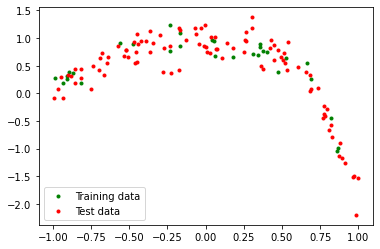

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='r', marker='.', label="Test data")
ax.legend()
plt.show()

<a id='question1'></a>

## Define function poly 
The `poly` function takes a vector $\mathbf{x}\in\mathbb{R}^D$ and a $K+1$-dimensional vector $\mathbf{w}$ as arguments, and returns the value of the $K$-th order polynomial: 
$$ f_K(\mathbf{x}) =  \langle \phi_K(\mathbf{x}), \mathbf{w}_K\rangle = w_0 + w_1 \mathbf{x} + w_2 \mathbf{x}^2 + \ldots + w_K \mathbf{x}^K, $$
with $f_K(\mathbf{x})\in\mathbb{R}^D$.

NB: although numpy already has a function `np.polyval` that does more or less the same thing as `poly`, your are asked to implement it yourself.

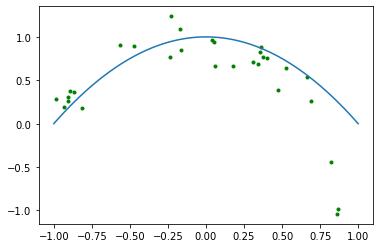

In [ ]:
def poly(x, weight):
    
    k = len(weight) 
    d = x.shape[0]
    xvec = np.zeros((d))
    for fkx in range(0, k):
        xvec += weight[fkx]*x**fkx

    return xvec
    

# Visualize the function to check if it is correct
w = [1, 0, -1]
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
y = poly(x, w)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.scatter(x_train, y_train, c='g', marker='.', label="Train data")
plt.show()

## Define embedding function

Now we need to define an embedding function that takes a vector $\mathbf{x}\in \mathbb{R}^D$ to a $D\times K+1$-dimensional space using the following expression:

$$\phi_K(\mathbf{x}) = \left[\begin{array}{c}\mathbf{1} & \mathbf{x} & \mathbf{x}^2 & \ldots & \mathbf{x}^K \end{array}\right]$$

$K$ should be an argument to the function. Keep in mind that we should also be able to apply the function to vectors. In other words, with an input vector $\mathbf{x} = [x_1, x_2, \ldots, x_D]^T$, the output should be the following array: 


$$\phi_K(\mathbf{x}) = \left[\begin{array}{cccc}
1 & x_1 & x_1^2 & \dots & x_1^K \\
1 & x_2 & x_2^2 & \dots & x_2^K \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_D & x_D^2 & \dots & x_D^K  
\end{array}\right]$$

In [ ]:
# x is expected to be a numpy array of dimensions (N,)
def embedding_func(x, K):
    phi = np.ones((x.shape[0], K+1))
    for i in range(1,K+1):
        phi[:,i] = x.ravel()**i
        
    return phi

x = np.array([2, 3])
print(embedding_func(x, 4))

[[ 1.  2.  4.  8. 16.]
 [ 1.  3.  9. 27. 81.]]


## Define a function that fits a $K$-th order polynomial and returns a weight vector $\mathbf{w}$

The input arguments for the function `estimate_w` are $(y,x,K)$ with $x,y\in\mathbb{R}^D$ and $K\in\mathbb{N}$. It returns a weight vector $\mathbf{w}\in\mathbb{R}^{K+1}$. Your task is to implement the least square minimization equation seen in class.


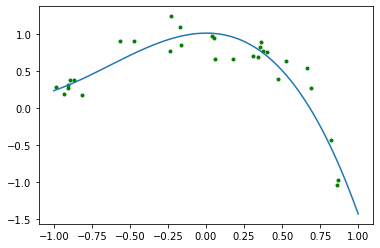

In [ ]:
def estimate_w(y, x, K):
    r = embedding_func(x,K)
    r_trans = np.transpose(r)
    w = np.linalg.solve(r_trans@r,r_trans)@y
   
    return w

w = estimate_w(y_train, x_train, 3)
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
y = poly(x, w)
fig, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(x_train, y_train, c='g', marker='.', label="Train data")
plt.show()


<a id='question2'></a>

## Fit 0-th to 10-th order polynomials to training data and plot resulting functions 


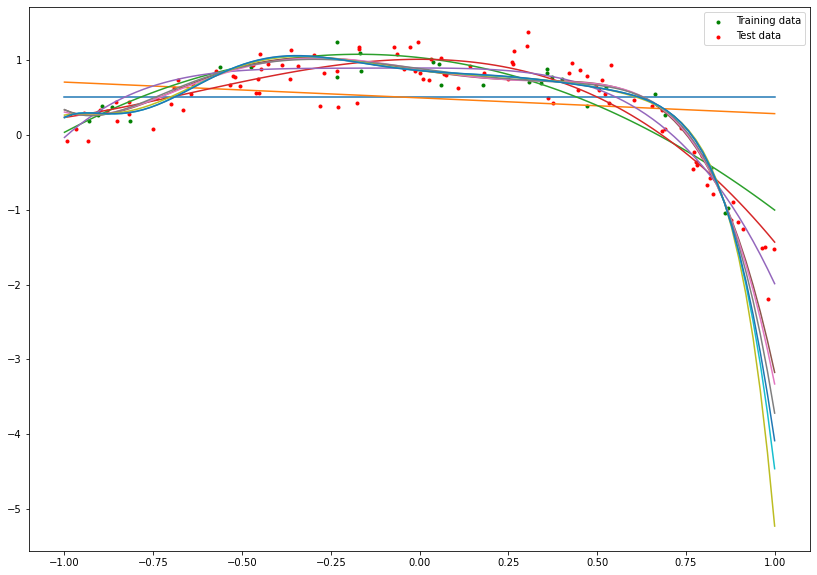

In [ ]:
K_max = 10

weights = []

x = np.linspace(-1.0, 1.0, num=100, endpoint=True)

fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='r', marker='.', label="Test data")

for K in range(K_max+1):
    weights.append(estimate_w(y_train, x_train, K))
    y = poly(x, weights[K])
    ax.plot(x,y)
    
ax.legend()
plt.show()

<a id='question3'></a>

## Compute the train and test error

Calculate the train and the test error given: 
\begin{equation}
E(f,\mathcal{S}) = \sum_i ||\mathbf{y}_i - f_K(\mathbf{x}_i)||^2
\end{equation}

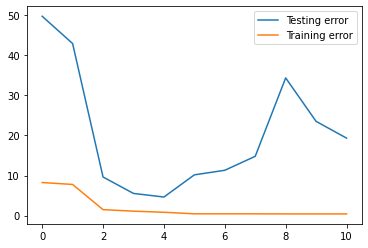

In [ ]:
error_train = np.zeros(K_max+1)
error_test = np.zeros(K_max+1)

for poly_degree in range(K_max+1):
    #training error
    sqerror_training = (y_train - embedding_func(x_train, poly_degree)@weights[poly_degree])**2
    error_train[poly_degree] = np.sum(sqerror_training)
    
    #test error
    sqerror_test = (y_test - embedding_func(x_test, poly_degree)@weights[poly_degree])**2
    error_test[poly_degree] = np.sum(sqerror_test)
  
    
fig, ax = plt.subplots()
ax.plot(error_test, label="Testing error")
ax.plot(error_train, label="Training error")
ax.legend()
plt.show()

In [ ]:
From the graph above, it can be seen that the training error decreases and tends towards zeroas the polynomials order 
increases. The testing error decreases initially, and then increases as the polynomial order passes the fourth order. This 
is most likely due to overfitting of the training data as the complexity of the model increases. Noise and random 
fluctuations in the training data is learned to the extent that it negatively impacts performance on new data. 

# Linear versus Logistic regression
## Import data from data_lin_vs_log.pkl

In [ ]:
def evaluate_linear_discriminant_on_grid(w_linear, loc_x, loc_y):
    grid_x, grid_y = np.meshgrid(loc_x, loc_y)
    sz_m, sz_n = grid_x.shape
    res = w_linear[0]*grid_x + w_linear[1]*grid_y + w_linear[2]

    return res, grid_x, grid_y

In [ ]:
# Load the dataset
# Load the file data_lin_vs_log.pkl

with open('data_lin_vs_log.pkl', 'rb') as handle:
    data= pickle.load(handle)

test_features = data['test_features']
test_labels = data['test_labels']
train_features = data['train_features']
train_labels = data['train_labels']

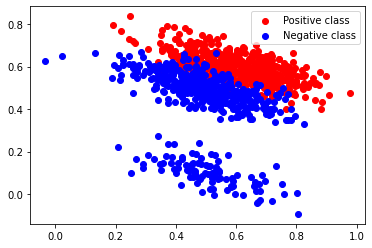

In [ ]:
# Display data
pos = np.nonzero(train_labels==1)[1]
neg = np.nonzero(train_labels!=1)[1]

fig, ax = plt.subplots()
ax.scatter(train_features[0, pos], train_features[1,pos], c="r", label="Positive class")
ax.scatter(train_features[0, neg], train_features[1,neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

## Linear Regression

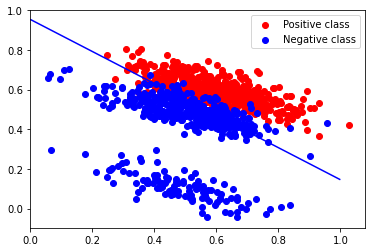

In [ ]:
## Train a linear classifier

X = train_features.T
Y = train_labels.T

##  form X^T X
XX = np.dot(X.T, X)

##  form X^T Y
YX = np.dot(X.T, Y)

##  solve   w  = (X^T X)^{-1}  (X^T Y)
w = np.linalg.solve(XX, YX)

## visualize classifier
fig, ax = plt.subplots()
## step 1: get its value over a regular grid of positions
loc_x = np.arange(0, 1.01, .01)
loc_y = np.arange(0, 1.01, .01)
function_values, grid_x, grid_y = evaluate_linear_discriminant_on_grid(w, loc_x, loc_y)

## step 2: plot the set of positions where its value equals .5
contour_values = [.5]
contPlt = ax.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)

## step 3: superimpose the points of the test set
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

ax.scatter(test_features[0, pos], test_features[1, pos], c="r", label="Positive class")
ax.scatter(test_features[0, neg], test_features[1, neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

<a id='question4'></a>
<a id='question5'></a>
<a id='question6'></a>

## Logistic regression

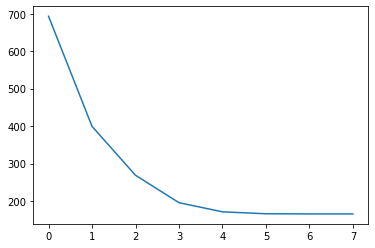

In [ ]:
w = np.array([[0], [0], [0]]) # Initialize w 
loss = []
sig_func = np.empty(Y.shape) # Array to store value of sigmoid function
grad = np.empty((3,1)) # Initialise gradient
r = np.zeros((Y.shape[0],Y.shape[0])) # Initialise R matrix

while 1:
    l_discriminant = X@w #Computes discriminant for first weight and store in l_discriminant
    sig_func = 1/(1+np.exp(-l_discriminant)) #Sigmoid value calculated for that particular weight
    loss_func = Y*np.log(sig_func)+(1-Y)*np.log(1-sig_func) #Taken from loss function as defined in question   
    loss.append(-np.sum(loss_func)) #Add to loss vector   
    grad = - X.T@(Y-sig_func)
    
    for i in range(Y.shape[0]):
        r[i,i]= sig_func[i]*(1-sig_func[i]) #r to plug into Hessian
    H = X.T@r@X #compute Hessian
    adjust = -np.linalg.solve(H,grad) #Solve linear matrix equation
    w = w + adjust
    if np.linalg.norm(adjust)<0.001*np.linalg.norm(w): #Boundary for convergence
        break   
    
fig, ax = plt.subplots()
ax.plot(loss)
plt.show()

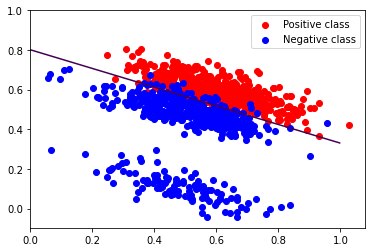

In [ ]:
## Step 1: get its value over a regular grid of positions
## Step 2: plot the set of positions where its value equals .5
x1 = np.linspace(0,1,1001)
x2 = np.linspace(0,1,1001)
l_discriminant = evaluate_linear_discriminant_on_grid(w, x1 ,x2 )
sig_func = 1/(1+np.exp(-l_discriminant[0]))
fig, ax = plt.subplots()
ax.contour(l_discriminant[1],l_discriminant[2],sig_func, [0.5])

## Step 3: superimpose the points of the test set
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

ax.scatter(test_features[0, pos], test_features[1, pos], c="r", label="Positive class")
ax.scatter(test_features[0, neg], test_features[1, neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

In [ ]:
The boundary fitted with linear regression has a steeper slope than the one fitted with logistic regression. 
This is because of the threshold within the sigmoid function, the values can only take 0 or 1. Therefore the fit isn't 
skewed by the outliers away from the main bulk of the points, particulary the cluster at the bottom, some of which are
negative. 